

---


## 📖 Introduction


Every time a customer makes a purchase — whether in-store or online — they leave behind a trail of information :
* the date of the purchase,
* the store location,
* the product chosen,
* the quantity bought,
* the amount spent.

On the surface, these records may appear as nothing more than rows in a spreadsheet :
* numbers,
* dates,
* product codes.

But transactions alone don’t tell the full story. Behind every purchase is a customer, each with their own lifestyle, preferences, and spending habits. By connecting transaction records with customer profiles — such as their lifestage and spending segment — we gain a richer perspective. We begin to see how different customer groups shop, which products appeal to specific demographics, and how spending behavior changes across life stages.

When visualized, these datasets reveal powerful patterns. We can observe which products surge in popularity during certain seasons, how budget-conscious customers differ from premium ones, and which promotions resonate with specific segments. What once looked like scattered data points now becomes a narrative about people, choices, and retail dynamics.

That’s the true value of combining transaction and customer data :

* It turns raw numbers into meaningful insights. By analyzing these patterns, businesses can optimize inventory, tailor promotions, and better understand their customers — ultimately making smarter, data-driven decisions in a competitive retail landscape.

---

---


##📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and discuss a couple of questions for better understanding of our intent — why we are analyzing this data, what kind of insights we hope to uncover, and how our choice of tools will help us achieve these goals.   

**Q1 : What do we understand by Time-Series Data?**  
In our project, time-series data simply means data that is recorded in order over time. For example, every transaction in the transaction dataset has a date attached to it. Once we add features like week, month, or quarter, we can start looking at how sales change across different periods.

This allows us to see trends such as :

* Do sales increase during festive seasons?

* Are weekends busier than weekdays?

* How do customer buying habits shift across months or years?

In short, time-series data doesn’t just tell us what was sold, it helps us understand when sales happen and how patterns evolve over time.

**Q2 : Was choosing Python a good decision for this analysis?**  
Yes, Python is definitely a smart choice for this kind of analysis. It offers :

* **Easy data handling** with pandas, which helps us clean, merge, and work with large datasets like ours (over 260,000 transactions).

* **Strong support** for time-series analysis with libraries like pandas and statsmodels.

* **Clear visualizations** using matplotlib, seaborn, or plotly to spot trends and patterns.

* **Scalability** to work with large amounts of data without much trouble.

* **Flexibility** to go beyond simple analysis into predictive modeling or machine learning if needed.


So, for a retail analytics project like this — where we want to connect customer information with transaction data over time — Python is a very good option.

---



---
##🎯 Objective :


The purpose of this project is to perform **Exploratory Data Analysis (EDA)** on the `Retail Sales` dataset to uncover meaningful insights regarding customer purchasing behavior and transaction patterns. The dataset contains detailed information on customer demographics, product categories, purchase dates, and transaction values. Through systematic exploration, this project aims to illustrate the underlying trends, relationships, and anomalies within the data.

The analysis includes identifying customer segments, understanding product-level performance, and exploring temporal patterns in purchase behavior. Furthermore, the study seeks to determine whether specific factors such as age, location, or product category significantly influence spending patterns. To achieve these goals, the study is guided by the following specific purposes:

- **Identifying store-wise and product-level sales trends**
- **Analyzing customer purchase behavior based on demographics**
- **Examining temporal patterns in transactions**
- **Exploring the relationship between price, quantity purchased, and total sales**  
- **Studying brand-level performance and customer preferences**

---





---


## ⚙️ Setting Things Up


Before we begin our analysis, we need to make sure we have the right tools.

In the next coding cell, we’ll import the required Python libraries that will help us clean, analyze, and visualize the Retail transaction and customer datasets.

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime
import re
from collections import Counter


In [166]:
# Settings for plots
sns.set(rc={"figure.figsize":(10,6)})

---

## 📂 Loading Our Dataset




Now that our setup is ready, it’s time to bring in the data we’ll be working with. In the next coding cell, we’ll load the Retail transaction and customer datasets from our files.

Once the data is loaded, we’ll display the first few rows to get a quick overview of what each dataset contains before moving into cleaning, analysis, and visualization.

In [167]:
file1_id = "1m60-1Tj3at_tKAG-TGzf68yrxTTyHQfC"
file2_id = "1QvOOKGg1cj-Rhh4gSKa_DNAk6IHMgAuM"

url1 = f"https://drive.google.com/uc?export=download&id={file1_id}"
url2 = f"https://drive.google.com/uc?export=download&id={file2_id}"

try:
  # Read Excel and CSV directly into pandas
  transactionData = pd.read_excel(url1)
  customerData = pd.read_csv(url2)
except Exception as e:
    print(f"Error loading data: {e}")



---


##1. Data Overview :

###1.1. General overview :

The first step in any analysis is to first understand the data. Let's take a look at each of the datasets provided.

In [168]:
# Display the data for further observations :
print(" The transaction data : ")
display(transactionData)
print("\n The customer data : ")
display(customerData)

 The transaction data : 


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8



 The customer data : 


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


Here’s the data overview of the last two uploaded datasets:
1. transactionData :

This dataset contains 264,836 transaction records of chip sales.

Variable Descriptions:

* `DATE` : Date of transaction (currently stored as Excel serial date, needs conversion to actual date).

* `STORE_NBR` : Store number where the purchase occurred.

* `LYLTY_CARD_NBR` : Loyalty card number of the purchasing customer.

* `TXN_ID` : Unique transaction identifier.

* `PROD_NBR` : Unique product identifier.

* `PROD_NAME` : Name of the product purchased (e.g., Smiths Crinkle Cut Chips Chicken 170g).

* `PROD_QTY` : Quantity of the product purchased in that transaction.

* `TOT_SALES` : Total sales value for the transaction (in dollars).

2. customerData :

This dataset contains 72,637 customer records describing customer profiles.

Variable Descriptions :

* `LYLTY_CARD_NBR` : Unique loyalty card number identifying each customer.

* `LIFESTAGE` : Customer’s life stage group (e.g., YOUNG SINGLES/COUPLES, MIDAGE SINGLES/COUPLES, OLDER FAMILIES).

* `PREMIUM_CUSTOMER` : Customer segmentation based on spending habits (e.g., Premium, Mainstream, Budget).


###1.2. Checking format of the transaction data :

We can use `info()` to look at the format of each column and see a sample of the data. As we have read in the dataset as a `pd` object, we can also run `transactionData` in the console to see a sample of the data or use `transactionData.head()` to look at the first 5 rows.

In [169]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


The dataset contains 264,836 records (rows) and 8 features (columns).

Out of the 8 features:

* 1 feature has floating-point (decimal) data type.

* 6 features have integer (whole number) data type.

* 1 feature has object (string) data type.

The `DATE` column is stored as an integer (Excel serial date) and will need conversion into a proper datetime format for analysis.

The dataset has no null values (all Non-Null Counts match the number of rows).

The memory requirement for this dataset is approximately 16.2 MB.

###1.3. Checking format of the customer data :

In [170]:
print(f"The structure of customer data : \n")
customerData.info()

The structure of customer data : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


The dataset contains 72,637 records (rows) and 3 features (columns).

Out of the 3 features:

* 1 feature has integer (whole number) data type.

* 2 features have object (string) data type.

The dataset has no null values (all Non-Null Counts equal the total number of rows).

The memory requirement for this dataset is approximately 1.7 MB.





---



---
## 2. Data Preprocessing :

With the overview, the dataset will not need a lot of data cleaning. However, there are certain transformations that needs to be done to ready the data for the analysis. Specifically, the `DATE` column and some others are not necessary for this particular analysis and will be removed. Feature engineering will also be done.

###2.1. Examining transaction data :


**Converting DATE column to a date format. A quick search online tells us that CSV and Excel integer dates begin on 30 Dec 1899.**

In [171]:
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], unit='D', origin= '1899-12-30')
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


####2.1.1. Finding target products for inference :

We should check that we are looking at the right products by examining `PROD_NAME`.

In [172]:
display(transactionData['PROD_NAME'].describe())    # Generate a summary of the PROD_NAME column.
unique_items = transactionData['PROD_NAME'].unique()   # Extract the unique items of the transactionData.
print(f"\nSome unique items of the transactionData :  \n {unique_items[0:20]}")

,PROD_NAME
count,264836
unique,114
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304



Some unique items of the transactionData :  
 ['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g']


Looks like we are definitely looking at potato chips but how can we check that these are all chips?

We can do some basic text analysis by summarising the individual words in the product name.

In [173]:
import re
from collections import Counter

# It takes the unique_item list (which contains unique product names) and joins all the elements into a single string.
# It places a space between each product name.
all_products = " ".join(unique_items)

# Replace digits and special characters with space and Keep only letters
clean_text = re.sub(r'[^A-Za-z]', ' ', all_products)

# Split into individual words and lowercase for uniformity
words = clean_text.lower().split()
# Count word frequencies

word_counts = Counter(words)

# Let's look at the most common words by counting the number of times a word appears
# Sorting them by this frequency in order of highest to lowest frequency

# Convert to DataFrame
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])

# Sorting them
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

print("\nDistinct words sorted by frequency (after cleaning) : ")
display(word_freq_df)


Distinct words sorted by frequency (after cleaning) : 


,word,frequency
0,g,114
1,chips,21
2,smiths,16
3,cut,14
4,crinkle,14
...,...,...
193,rst,1
194,pork,1
195,belly,1
196,pc,1


There are salsa and dip products in the dataset but we are only interested in the chips category, so let's remove these.

In [174]:
# Name of the products that contains salsa or dip.
non_chips = transactionData["PROD_NAME"].str.contains('salsa | dip',case = False)

# The transactions that contain salsa and dip products.
transactionData_non_chips = transactionData[non_chips]
print(f"\nThe products that does not contain any chips item : \n")
display(transactionData_non_chips)

# The transactions that contain chips products.
transactionData_chips = transactionData[~non_chips]
print(f"\n\nThe products that contain chips item : \n")
display(transactionData_chips)

print(f"\n\nThe numer of times each product have bought : \n")

# Number of trensactions for each product
transactionData_chips.groupby('PROD_NAME').size().reset_index(name='Transaction_count')


The products that does not contain any chips item : 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6
...,...,...,...,...,...,...,...,...
264675,2019-04-20,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1
264678,2019-03-30,265,265111,263428,35,Woolworths Mild Salsa 300g,1,1.5
264719,2018-10-28,266,266278,264104,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
264734,2019-01-11,267,267324,264374,41,Doritos Salsa Mild 300g,1,2.6




The products that contain chips item : 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8




The numer of times each product have bought : 



,PROD_NAME,Transaction_count
0,Burger Rings 220g,1564
1,CCs Nacho Cheese 175g,1498
2,CCs Original 175g,1514
3,CCs Tasty Cheese 175g,1539
4,Cheetos Chs & Bacon Balls 190g,1479
...,...,...
100,WW Original Corn Chips 200g,1495
101,WW Original Stacked Chips 160g,1487
102,WW Sour Cream &OnionStacked Chips 160g,1483
103,WW Supreme Cheese Corn Chips 200g,1509


####2.1.2. Checking for outliers :

Next, we can use `describe()` to check summary statistics such as mean, min and max values for each feature to see if there are any obvious outliers in the data and if there are any nulls in any of the columns (`NaN : number of nulls` will appear in the output if there are any nulls).

In [175]:
transactionData_chips.describe()    # Summarise the data to check for nulls and possible outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


There are no nulls in the columns but product quantity appears to have an outlier which we should investigate further. Let's investigate the case where 200 packets of chips are bought in one transaction.

In [176]:
# The transactions that contains 200(maximum) product quantity
max_product_quantity = transactionData_chips[transactionData_chips['PROD_QTY'] == 200]
print(f"\nThe transactions that have max quantity : \n")
display(max_product_quantity)


The transactions that have max quantity : 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer.

In [177]:
# The other transactions that customer made.
max_product_quantity_customer = transactionData_chips[transactionData_chips['LYLTY_CARD_NBR'] == 226000]
print(f"\nThe customers who have max quantity transaction : \n")
display(max_product_quantity_customer)


The customers who have max quantity transaction : 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.

In [178]:
# Filter out the customer based on the loyalty card number.
transactionData_chips_cleaned = transactionData_chips.drop(max_product_quantity_customer.index)

# Re-examine transaction data
transactionData_chips_cleaned.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


####2.1.3. Handling missing values :

 Now, let's look at the number of transaction lines over time to see if there are any obvious data issues such as missing data.

In [179]:
# Grouping transactions by date, counts how many occurred each day, resets the result into a DataFrame, and sorts it by date in ascending order.
transactionData_by_date = transactionData_chips_cleaned.groupby('DATE').size().reset_index(name='transaction_count').sort_values(by='DATE',ascending=True)
print(f"The transactions by date : ")
display(transactionData_by_date)

The transactions by date : 


,DATE,transaction_count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


There's only 364 rows, meaning only 364 dates but from 2018-07-01	to 2019-06-30	there are 365 dates, which indicates a missing date. Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date.

In [180]:
daily_counts = pd.date_range(start = '2018-7-1', end = '30/6/2019', freq = 'D')

# Create a column of dates that includes every day from 1 Jul 2018 to 30 Jun 2019
daily_counts_df = pd.DataFrame(daily_counts, columns=['DATE'])

# Join that column of dates onto the transactionData.
transactionData_chips_cleaned_by_day = daily_counts_df.merge(transactionData_chips_cleaned.sort_values(by = 'DATE'), on='DATE', how='left')

# Fill the missng value by 0
transactionData_chips_cleaned_by_day = transactionData_chips_cleaned_by_day.fillna(0)
name = ['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR','PROD_QTY']
transactionData_chips_cleaned_by_day[name] = transactionData_chips_cleaned_by_day[name].astype(int)

print(f"The transaction count with all : ")
display(transactionData_chips_cleaned_by_day)

# Extracting the date containing 0 as total sales
missing_dates = transactionData_chips_cleaned_by_day[transactionData_chips_cleaned_by_day['TOT_SALES'] == 0]['DATE']
print("\nMissing date(s) with no transactions: \n", missing_dates)

The transaction count with all : 


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-07-01,88,88140,86914,25,Pringles SourCream Onion 134g,2,7.4
1,2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2
2,2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6
3,2018-07-01,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0
4,2018-07-01,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4
...,...,...,...,...,...,...,...,...
246736,2019-06-30,112,112141,114611,98,NCC Sour Cream & Garden Chives 175g,2,6.0
246737,2019-06-30,207,207155,205513,99,Pringles Sthrn FriedChicken 134g,2,7.4
246738,2019-06-30,10,10140,9882,12,Natural Chip Co Tmato Hrb&Spce 175g,2,6.0
246739,2019-06-30,6,6258,6047,29,French Fries Potato Chips 175g,1,3.0



Missing date(s) with no transactions: 
 120465   2018-12-25
Name: DATE, dtype: datetime64[ns]


####2.1.4. Inference of missing date :

Now let's plot the transactionData by date, for further observation

The amount of daily transactions : 


,DATE,transaction_count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
360,2019-06-26,657
361,2019-06-27,669
362,2019-06-28,673
363,2019-06-29,703



The Plot of daily transactions over the whole time : 


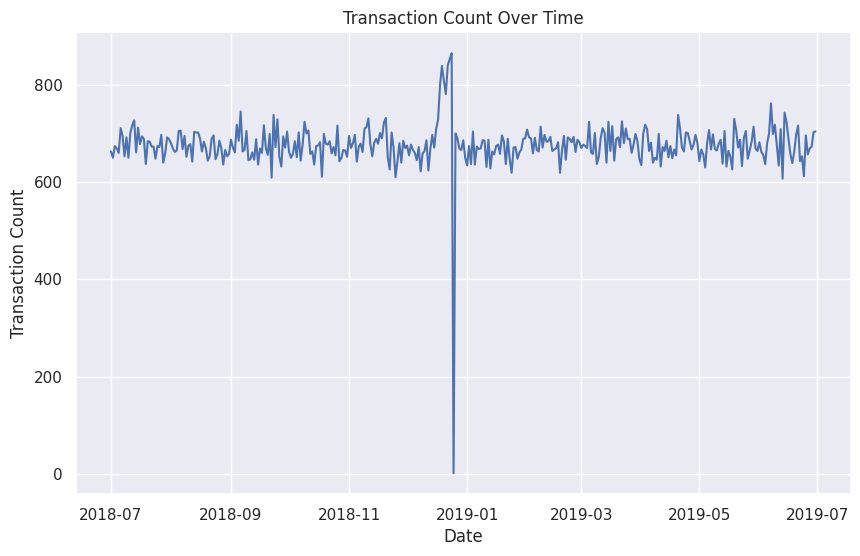

In [181]:
transactionData_by_day_table = transactionData_chips_cleaned_by_day.groupby('DATE').size().reset_index(name='transaction_count').sort_values(by='DATE',ascending=True)
print("The amount of daily transactions : ")
display(transactionData_by_day_table)

print("\nThe Plot of daily transactions over the whole time : ")
plt.plot(transactionData_by_day_table['DATE'], transactionData_by_day_table['transaction_count'])
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Transaction Count Over Time')
plt.show()

We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.

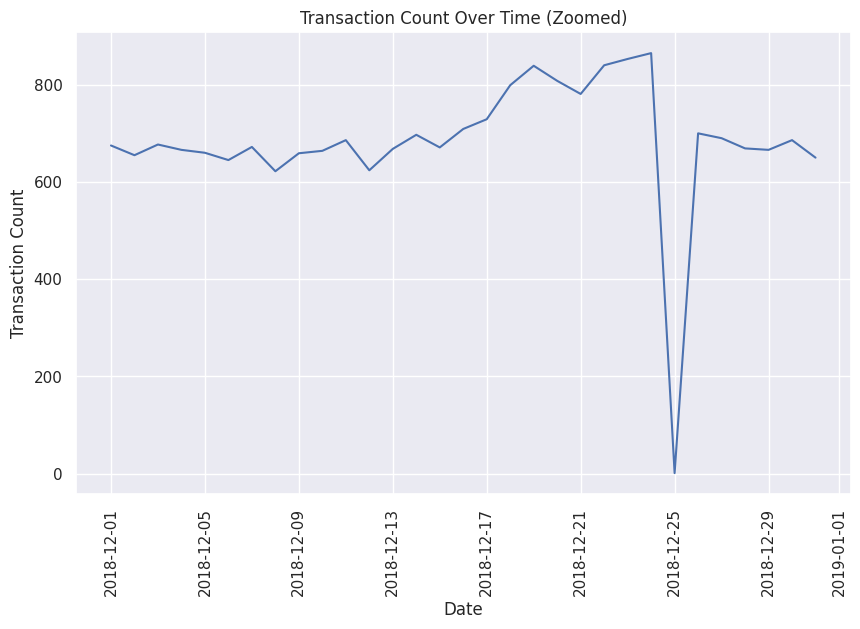

In [182]:
# Filter to December
transactions_by_day_zoomed = transactionData_by_day_table[(transactionData_by_day_table['DATE'] >= '2018-12-01') &
                                                          (transactionData_by_day_table['DATE'] <= '2018-12-31')]
plt.plot(transactions_by_day_zoomed['DATE'], transactions_by_day_zoomed['transaction_count'])
plt.xticks(rotation=90)   # display the x_axis labels at an angel of 90 degrees
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Transaction Count Over Time (Zoomed)')
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

####2.1.5. Feature extraction :

Now that we are satisfied that the data no longer has outliers, we can move on to creating other features such as brand of chips or pack size from `PROD_NAME`.

#####2.1.5.1 Checking pack size :

We will start with pack size.

In [183]:
# Extract the unique items of PROD_NAME from the transactionData.
item_names = transactionData_chips_cleaned['PROD_NAME']

# It takes the unique_item list (which contains unique product names) and
# joins all the elements into a single string. It places a space between each product name.
all_products = "  ".join(item_names )

# It extracts all substrings from all_products that consist of one or more digits immediately followed by the letter 'g' (e.g., '175g').
PACK_SIZE = re.findall(r'\d+', all_products)


The largest size is 380g and the smallest size is 70g - seems sensible!

#####2.1.5.2 Checking brands :

Now to create brands, we can use the first word in PROD_NAME to work out the brand name.

In [184]:
# Extract the items of PROD_NAME from the transactionData.
unique_items = transactionData_chips_cleaned['PROD_NAME']

# Extracts the first word (usually brand name) from each product name in unique_item by cleaning spaces and splitting the text.
BRANDS = [''.join(item.strip().split()[0]) for item in unique_items]
BRANDS_count_table = pd.DataFrame(Counter(BRANDS).items(),columns=['BRAND_NAME','frequency']).sort_values(by='frequency', ascending=False)
print("Distinct brands sorted by frequency : ")
display(BRANDS_count_table)

Distinct brands sorted by frequency : 


,BRAND_NAME,frequency
3,Kettle,41288
2,Smiths,27390
14,Pringles,25102
5,Doritos,22041
8,Thins,14075
22,RRD,11894
16,Infuzions,11057
7,WW,10320
20,Cobs,9693
23,Tostitos,9471


Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red Rock Deli chips and WW is Woolworths. Let's replace these.

In [185]:
replacements = {
    'Red': 'Red Rock Deli',
    'RRD': 'Red Rock Deli',
    'WW': 'Woolworths',
    'Smith': 'Smiths'
}
# Replace brands if in dictionary, otherwise keep same
BRANDS = [replacements.get(brand, brand) for brand in BRANDS]

BRANDS_count_table = pd.DataFrame(Counter(BRANDS).items(),columns=['BRAND_NAME','frequency']).sort_values(by='frequency', ascending=False)

print("Distinct brands sorted by frequency after combining similar brands : ")
display(BRANDS_count_table)

Distinct brands sorted by frequency after combining similar brands : 


,BRAND_NAME,frequency
3,Kettle,41288
2,Smiths,30353
14,Pringles,25102
5,Doritos,22041
13,Red Rock Deli,16321
8,Thins,14075
7,Woolworths,11836
16,Infuzions,11057
19,Cobs,9693
21,Tostitos,9471


#####2.1.5.3 Checking selling price :

In [186]:
# calculating selling price for the each product
SELLING_PRICE = transactionData_chips_cleaned['TOT_SALES'] / transactionData_chips_cleaned['PROD_QTY']

#####2.1.5.4. Checking year, month, quarter, day and week :

extracting specific date values from the `DATE` column for trend of sales with respect to different time units

In [187]:
DATE = pd.to_datetime(transactionData_chips_cleaned['DATE'])
YEAR = DATE.dt.year
MONTH = DATE.dt.month
QUARTER = DATE.dt.quarter
WEEK = ((DATE.dt.day - 1) // 7 + 1)

####2.1.6. Getting cleaned data :

In [188]:
transactionData_chips_cleaned['BRANDS'] = BRANDS
transactionData_chips_cleaned['PACK_SIZE'] = PACK_SIZE
transactionData_chips_cleaned['SELLING_PRICE'] = SELLING_PRICE
transactionData_chips_cleaned['YEAR'] = YEAR
transactionData_chips_cleaned['MONTH'] = MONTH
transactionData_chips_cleaned['QUARTER'] = QUARTER
transactionData_chips_cleaned['WEEK'] = WEEK

transactionData_cleaned = transactionData_chips_cleaned[['DATE', 'YEAR', 'MONTH', 'QUARTER', 'WEEK', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
                                                         'BRANDS', 'PROD_NAME', 'PACK_SIZE', 'PROD_QTY', 'SELLING_PRICE', 'TOT_SALES']]
print(f"The cleaned data : ")
display(transactionData_cleaned)

The cleaned data : 


,DATE,YEAR,MONTH,QUARTER,WEEK,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRANDS,PROD_NAME,PACK_SIZE,PROD_QTY,SELLING_PRICE,TOT_SALES
0,2018-10-17,2018,10,4,3,1,1000,1,5,Natural,Natural Chip Compny SeaSalt175g,175,2,3.00,6.0
1,2019-05-14,2019,5,2,2,1,1307,348,66,CCs,CCs Nacho Cheese 175g,175,3,2.10,6.3
2,2019-05-20,2019,5,2,3,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken 170g,170,2,1.45,2.9
3,2018-08-17,2018,8,3,3,2,2373,974,69,Smiths,Smiths Chip Thinly S/Cream&Onion 175g,175,5,3.00,15.0
4,2018-08-18,2018,8,3,3,2,2426,1038,108,Kettle,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,3,4.60,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,2019,3,1,2,272,272319,270088,89,Kettle,Kettle Sweet Chilli And Sour Cream 175g,175,2,5.40,10.8
264832,2018-08-13,2018,8,3,2,272,272358,270154,74,Tostitos,Tostitos Splash Of Lime 175g,175,1,4.40,4.4
264833,2018-11-06,2018,11,4,1,272,272379,270187,51,Doritos,Doritos Mexicana 170g,170,2,4.40,8.8
264834,2018-12-27,2018,12,4,4,272,272379,270188,42,Doritos,Doritos Corn Chip Mexican Jalapeno 150g,150,2,3.90,7.8


###2.2. Examining customer data :

Now that we are happy with the transaction dataset, let's have a look at the customer dataset.

Based on the initial overview of the dataset, no data cleaning or transformation is required, as the dataset is already structured and ready for analysis.

###2.3 The final data :

####2.3.1. Obtainig the data :

Merge transaction data to customer data

In [189]:
data = transactionData_cleaned.merge(customerData, on = 'LYLTY_CARD_NBR', how = 'left')
print(f"The merged data : ")
display(data)

The merged data : 


,DATE,YEAR,MONTH,QUARTER,WEEK,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRANDS,PROD_NAME,PACK_SIZE,PROD_QTY,SELLING_PRICE,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,2018,10,4,3,1,1000,1,5,Natural,Natural Chip Compny SeaSalt175g,175,2,3.00,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,2019,5,2,2,1,1307,348,66,CCs,CCs Nacho Cheese 175g,175,3,2.10,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,2019,5,2,3,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken 170g,170,2,1.45,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2018,8,3,3,2,2373,974,69,Smiths,Smiths Chip Thinly S/Cream&Onion 175g,175,5,3.00,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2018,8,3,3,2,2426,1038,108,Kettle,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,3,4.60,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,2019,3,1,2,272,272319,270088,89,Kettle,Kettle Sweet Chilli And Sour Cream 175g,175,2,5.40,10.8,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,2018,8,3,2,272,272358,270154,74,Tostitos,Tostitos Splash Of Lime 175g,175,1,4.40,4.4,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,2018,11,4,1,272,272379,270187,51,Doritos,Doritos Mexicana 170g,170,2,4.40,8.8,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,2018,12,4,4,272,272379,270188,42,Doritos,Doritos Corn Chip Mexican Jalapeno 150g,150,2,3.90,7.8,YOUNG SINGLES/COUPLES,Premium


####2.3.2. Checking format of the data :

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   YEAR              246740 non-null  int32         
 2   MONTH             246740 non-null  int32         
 3   QUARTER           246740 non-null  int32         
 4   WEEK              246740 non-null  int32         
 5   STORE_NBR         246740 non-null  int64         
 6   LYLTY_CARD_NBR    246740 non-null  int64         
 7   TXN_ID            246740 non-null  int64         
 8   PROD_NBR          246740 non-null  int64         
 9   BRANDS            246740 non-null  object        
 10  PROD_NAME         246740 non-null  object        
 11  PACK_SIZE         246740 non-null  object        
 12  PROD_QTY          246740 non-null  int64         
 13  SELLING_PRICE     246740 non-null  float64       
 14  TOT_

The dataset contains 246,740 records (rows) and 17 features (columns).

Out of the 17 features :

- 1 feature has datetime data type.

- 2 features have floating-point (decimal) data type.

- 9 features have integer (whole number) data type (4 stored as `int32` and 5 as `int64`).

- 5 features have object (string) data type.

The dataset has no null values (all Non-Null Counts match the number of rows).

The memory requirement for this dataset is approximately 28.2 MB.


####2.3.3. Checking for duplicates values :

As the number of rows in `data` is the same as that of `transactionData`, we can be sure that no duplicates were created. This is because we created `data` by setting `how = 'left'` (in other words, a left join) which means take all the rows in `transactionData` and find rows with matching values in shared columns and then joining the details in these rows to the `LYLTY_CARD_NBR` or the first mentioned table.

####2.3.4. Checking for missing values :

Let's also check if some customers were not matched on by checking for nulls.

In [191]:
missing_customer = data[data['LIFESTAGE'].isna()]   # we can also use isnull() instead of isna() .
print("The missing customer data:")
display(missing_customer)

The missing customer data:


,DATE,YEAR,MONTH,QUARTER,WEEK,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRANDS,PROD_NAME,PACK_SIZE,PROD_QTY,SELLING_PRICE,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER


Great, there are no nulls! So all our customers in the transaction data has been accounted for in the customer dataset.


With this, the data is now ready for analysis. Data cleaning and transformations are always done to almost all real-world datasets. This includes handling for missing values, casting data to appropriate data types, standardizing or normalizing values, feature engineering, and date time and string types transformations, among others. Since this particular dataset only requires some transformations and not much cleaning, we can now move one.


---



---
## 3. Exploratory Data Analysis including visualization :

###3.1. Store-wide Sales :

Top 10 High-Selling Stores:


,STORE_NBR,TOT_SALES
224,226,16544.65
87,88,15445.85
164,165,15188.35
235,237,14830.60
39,40,14427.30
57,58,14256.95
198,199,13975.90
3,4,13709.25
202,203,13623.40
25,26,13597.20


/tmp/ipython-input-2922902859.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="STORE_NBR", y="TOT_SALES", data=top_stores, palette="viridis")


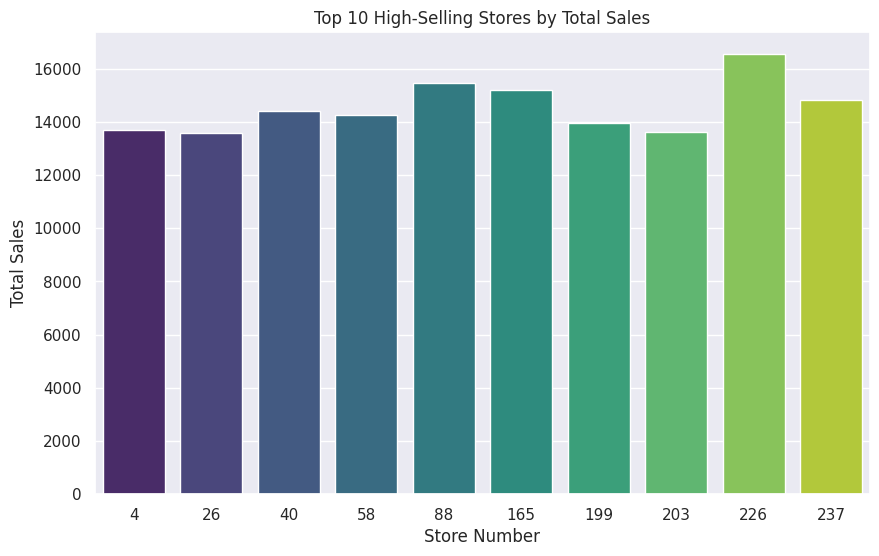

In [192]:
# Aggregate sales by store
store_sales = data.groupby("STORE_NBR")["TOT_SALES"].sum().reset_index()

# Sort by sales (descending)
store_sales = store_sales.sort_values(by="TOT_SALES", ascending=False)

# Pick top 10 high-selling stores
top_stores = store_sales.head(10).sort_values(by="TOT_SALES", ascending=False)

# Show the table of top stores
print("Top 10 High-Selling Stores:")
display(top_stores)

# Plot only top stores
plt.figure()
sns.barplot(x="STORE_NBR", y="TOT_SALES", data=top_stores, palette="viridis")
plt.title("Top 10 High-Selling Stores by Total Sales")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.show()


####**📊 Explanation : Top 10 High-Selling Stores by Total Sales**

As depicted in the bar graph above, we can conclude that certain stores significantly outperform others in terms of their total sales.  
To study this, the dataset was grouped using the `groupby()` function in Python on the `STORE_NBR` column, and the corresponding total sales for each store were aggregated using `.sum()`.  
The results were then sorted in descending order, and the **top 10 stores by total sales** were visualized using the **Seaborn library**.  

- **Store 226** has the highest overall sales, followed closely by Stores **88** and **165**.  
- Stores such as **40, 58, and 237** also show consistently strong sales performance, placing them in the higher tier.  
- In contrast, while Stores **4, 26, 199, and 203** make it to the top 10 list, their cumulative sales are relatively lower than the leading stores.  

✅ **Key Insight :**  

The results show that **a small number of stores are responsible for most of the revenue in the retail business**.  

📌 **Interpretation :**  

This may be due to factors like the **size of the store**, **its location**, and the **range of products** it offers.  
By understanding these factors, **businesses can make better choices about resource allocation, marketing activities, and store expansion decisions**.  




Seles of Brands in top selling Store:


,BRANDS,TOT_SALES
7,Kettle,4300.60
8,Pringles,2012.80
3,Doritos,1941.60
9,Smiths,1309.40
12,Twisties,1070.10
10,Thins,1023.00
11,Tostitos,910.80
1,Cobs,843.60
5,Infuzions,790.40
13,Tyrrells,735.00


/tmp/ipython-input-3940290600.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TOT_SALES", y="BRANDS", data=top_store_sales, palette="viridis")


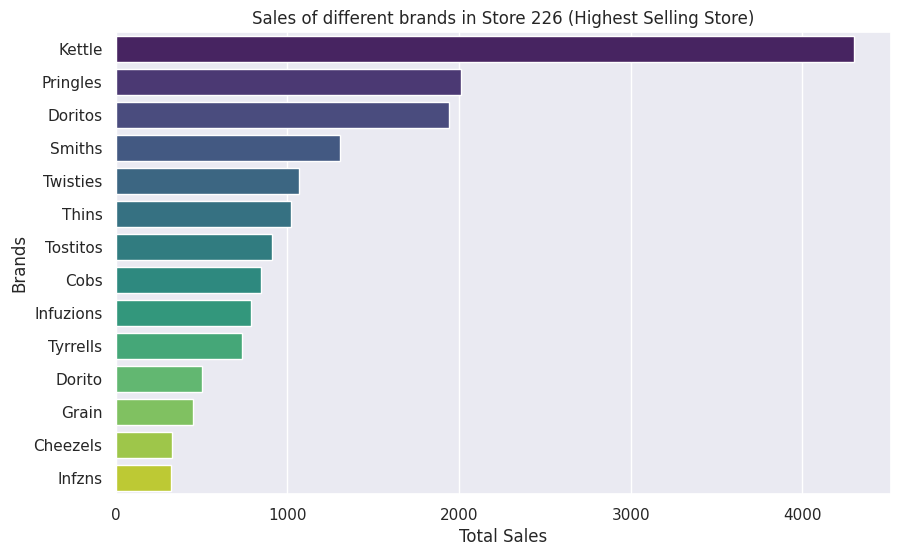

In [193]:
# Filter dataset for that best selling store
top_store_nbr = top_stores.iloc[0]["STORE_NBR"]
top_store_sales = data[data["STORE_NBR"] == top_store_nbr].groupby("BRANDS")["TOT_SALES"].sum().reset_index()

# Sort top products in that store
top_store_sales = top_store_sales.sort_values("TOT_SALES", ascending=False)

# Show the table of top stores
print("Seles of Brands in top selling Store:")
display(top_store_sales)

# Plot sales of top products in highest selling store
plt.figure(figsize=(10,6))
sns.barplot(x="TOT_SALES", y="BRANDS", data=top_store_sales, palette="viridis")
plt.title(f"Sales of different brands in Store {int(top_store_nbr)} (Highest Selling Store)")
plt.xlabel("Total Sales")
plt.ylabel("Brands")
plt.show()


####**📊 Explanation : Brand Sales within Store 226 (Highest-Selling Store)**

As depicted in the bar graph above, the sales contribution of different brands within **Store 226** (**the highest-selling store**) can be observed.  
The dataset was filtered specifically for this store, and total sales were aggregated across each brand using the `groupby()` function in Python.  
The results were then sorted in descending order and visualized using the **Seaborn library**.  

- **Kettle** is the dominant brand in Store 226, with sales figures far exceeding those of other brands, crossing the **4,000** mark.  
- **Pringles** and **Doritos** follow as the next highest-selling brands, although their sales are roughly half of Kettle’s total, highlighting a significant performance gap.  
- Other brands such as **Smiths, Twisties, and Thins** also show strong contributions but remain in the mid-tier range.  
- Meanwhile, brands like **Cheezels, Grain, and Infzns** account for comparatively lower sales, making up the lower tier in this store’s brand performance.  

✅ **Key Insight :**

This analysis suggests that **a few key brands drive the majority of sales within the top-performing store**.  

📌 **Interpretation :**  

This implies that **stocking strategies, promotional offers, and marketing campaigns** for these dominant brands could have a significant impact on overall store revenue.  
Conversely, understanding why lower-performing brands contribute less may help in **optimizing shelf space, rethinking product placement, or tailoring promotions** to boost their sales.  


###3.2. Product-level Sales Trends :

Top 10 High-Selling Products :


,BRANDS,PACK_SIZE,TOT_SALES
19,Kettle,175,196668.0
22,Pringles,134,177655.5
18,Kettle,150,167481.4
9,Doritos,170,106264.4
32,Thins,175,88852.5
33,Tostitos,175,79789.6
6,Cobs,110,70569.8
14,Infuzions,110,69395.6
28,Smiths,330,69106.8
35,Twisties,270,55425.4


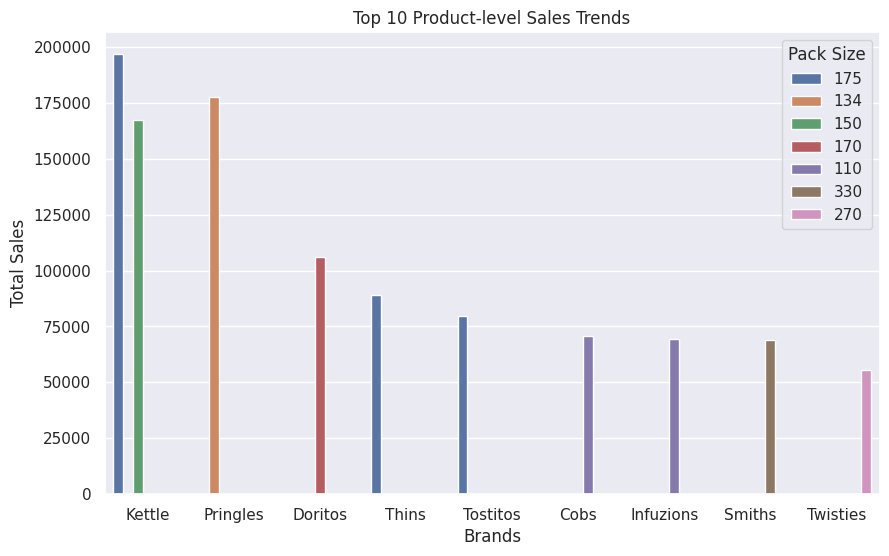

In [194]:
product_sales = data.groupby(["BRANDS", "PACK_SIZE"])["TOT_SALES"].sum().reset_index()

top_products = product_sales.sort_values("TOT_SALES", ascending=False).head(10)

# Show the table of top products(pack sizes)
print("Top 10 High-Selling Products :")
display(top_products)

plt.figure()
sns.barplot(x="BRANDS", y="TOT_SALES", data=top_products, hue="PACK_SIZE")
plt.legend(title = "Pack Size")
plt.title("Top 10 Product-level Sales Trends")
plt.xlabel("Brands")
plt.ylabel("Total Sales")
plt.show()

####**📊 Explanation : Top 10 Product-level Sales Trends**

As shown in the bar graph above, the **top 10 product-level sales trends** are illustrated by aggregating sales across both **brand** and **pack size**.  
The dataset was grouped using the `groupby()` function on the `BRANDS` and `PACK_SIZE` columns, and the total sales (`TOT_SALES`) were computed.  
The results were then sorted in descending order, and the highest-selling brand–pack combinations were visualized using the **Seaborn library**.  

- **Kettle (175g pack)** is the leading product, achieving close to **200,000** in total sales.  
- This is followed by **Pringles (134g pack)** and **Kettle (150g pack)**, both of which show strong performance with sales figures exceeding **170,000**.  
- **Doritos (170g pack)** ranks next with sales above **100,000**, while other products such as **Thins (175g), Tostitos (175g), Cobs (110g), Infuzions (110g), Smiths (110g), and Twisties (270g)** make up the remaining positions in the top 10.  

✅ **Key Insight :**  

- **Mid-sized packs (110g–175g)** dominate sales compared to smaller or very large pack sizes, suggesting that customers prefer moderate pack sizes that balance price and quantity.  
- The dominance of brands such as **Kettle, Pringles, and Doritos** highlights strong **brand loyalty** and **consumer preference** in this retail dataset.  

📌 **Interpretation :**  

This analysis suggests that both **brand strength** and **optimal pack size** are critical drivers of product-level sales.  
Understanding these patterns can guide **inventory planning, product assortment strategies, and promotional campaigns**, with a focus on high-performing product-pack combinations, while also reevaluating the role of lower-selling sizes.  


###3.3. Brand-level Performance :

Top 10 High-Selling brands :


,BRANDS,TOT_SALES
0,Kettle,390239.8
1,Smiths,217492.0
2,Doritos,187277.9
3,Pringles,177655.5
4,Thins,88852.5
5,Red Rock Deli,87607.5
6,Twisties,81522.1
7,Tostitos,79789.6
8,Infuzions,76247.6
9,Cobs,70569.8


/tmp/ipython-input-244668740.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TOT_SALES", y="BRANDS", data=brand_sales, palette="viridis")


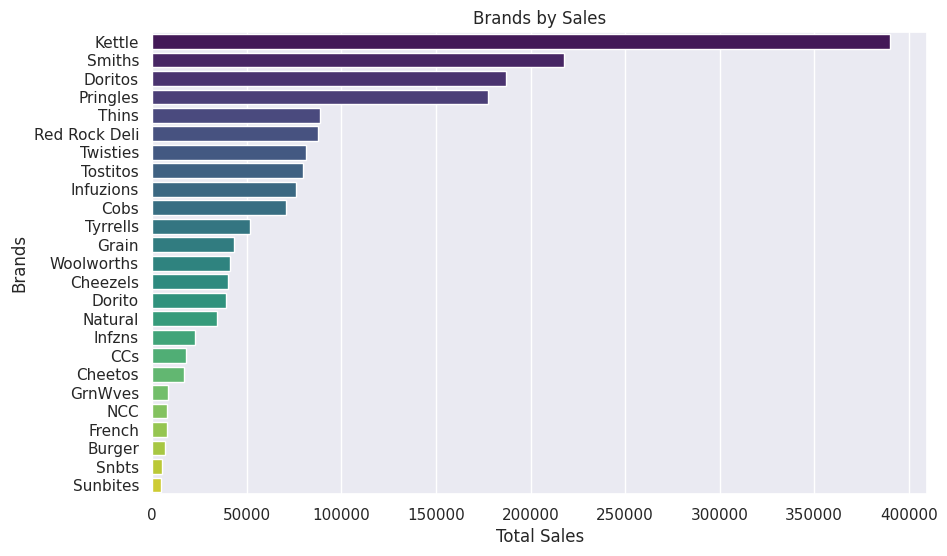

In [195]:
brand_sales = data.groupby("BRANDS")["TOT_SALES"].sum().sort_values(ascending=False).reset_index()
top_brands = brand_sales.sort_values("TOT_SALES", ascending=False).head(10)

# Show the table of top products(pack sizes)
print("Top 10 High-Selling brands :")
display(top_brands)

plt.figure()
sns.barplot(x="TOT_SALES", y="BRANDS", data=brand_sales, palette="viridis")
plt.title("Brands by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Brands")
plt.show()


####**📊 Explanation : Brands by Sales**

As illustrated in the bar chart above, the sales contribution of different **brands** has been computed by aggregating the `TOT_SALES` column across all transactions.  
The dataset was grouped by the `BRANDS` field using the `groupby()` function in Python, followed by summation of total sales.  
The results were then sorted in descending order and visualized using the **Seaborn library**.  

- **Kettle** is the leading brand, generating sales close to **400,000**, which is significantly higher than all other brands.  
- **Smiths, Doritos, and Pringles** follow as other strong performers, with sales ranging between **150,000 and 200,000**.  
- Mid-tier brands such as **Thins, Red Rock Deli, Twisties, and Tostitos** contribute steadily but at much lower levels compared to the top four.  
- Brands such as **Infuzions, CCs, Cheetos, and Sunbites** represent the lower end of the sales spectrum with comparatively minimal contributions.  

📌 **Interpretation :**

This analysis suggests that a handful of brands dominate the overall sales performance, with **Kettle alone contributing disproportionately** to total revenue.  
Such dominance reflects both **brand loyalty and customer preference**, and it highlights the importance of prioritizing **inventory management, marketing strategies, and promotional campaigns** for the top-selling brands.  
Lower-performing brands may require targeted actions such as **discounts, better shelf placement, or repositioning** to improve their sales.  


###3.4. Demographics :

The total sales by LIFESTAGE and PREMIUM_CUSTOMER : 


,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


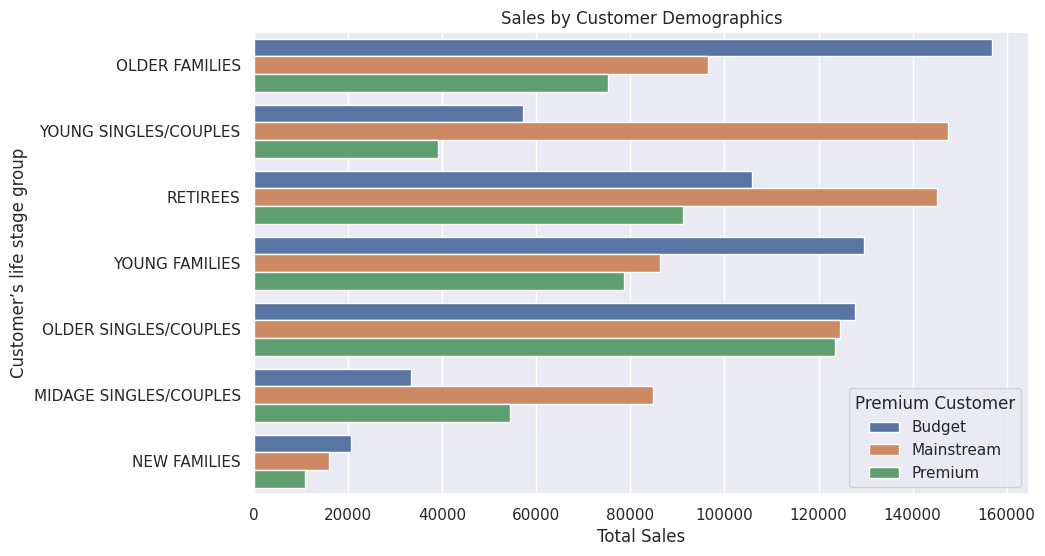

In [196]:
demo_sales = data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()

print(f"The total sales by LIFESTAGE and PREMIUM_CUSTOMER : ")
display(demo_sales.sort_values("TOT_SALES", ascending=False))

plt.figure()
sns.barplot(x="TOT_SALES", y="LIFESTAGE", hue="PREMIUM_CUSTOMER", data=demo_sales.sort_values("TOT_SALES", ascending=False))
plt.title("Sales by Customer Demographics")
plt.legend(title = "Premium Customer")
plt.ylabel("Customer’s life stage group")
plt.xlabel("Total Sales")
plt.show()


#### **📊 Explanation : Sales by Customer Demographics**

The chart shows **total sales segmented by customer life stage group and premium status** (Budget, Mainstream, Premium).

- **Older Families** generate the highest total sales, particularly within the **Budget segment**, indicating they are a dominant customer group for this product category.  
- **Young Singles/Couples** and **Retirees** are also major contributors, with **Mainstream customers** leading in both groups.  
- **Young Families** show strong sales, mostly driven by **Budget customers**, followed closely by **Mainstream customers**.  
- **Older Singles/Couples** also contribute significantly across all three premium categories, showing a fairly **balanced distribution**.  
- **Midage Singles/Couples** sales are moderate, with **Mainstream being the largest contributor**.  
- **New Families** contribute the least overall, suggesting they are a relatively smaller consumer base in this dataset.  


✅ **Key Insight :**

- **Life stage matters**: Sales are concentrated in **Older Families, Young Singles/Couples, Retirees, and Young Families** — these groups should be the focus of marketing and promotions.  
- **Premium segmentation :**  
  - **Budget customers dominate** in *Older Families* and *Young Families*.  
  - **Mainstream customers dominate** in *Young Singles/Couples* and *Retirees*.  
  - **Premium customers** are strongest in *Older Singles/Couples*, showing they may be more **brand/quality-oriented** in that stage.  
- **Smaller groups** (e.g., *New Families, Midage Singles/Couples*) represent niche markets but may be growth opportunities with targeted campaigns.  


📌 **Interpretation :**

This analysis suggests that **family life stage** and **spending profile** (budget vs. mainstream vs. premium) are critical factors in sales performance.  

- To maximize revenue, businesses should prioritize **Older Families, Young Singles/Couples, and Retirees**, tailoring promotions to their premium status (*budget vs. mainstream*).  
- **Premium positioning** works well with **Older Singles/Couples**, while **budget-friendly offers** resonate with **family groups**.  
- For **underrepresented groups** (e.g., *New Families*), specialized campaigns could unlock **new sales potential**.  



###3.5. Basket/Transaction Analysis :

The basket size and basket value : 


,count
PROD_QTY,
2,217316
1,25319
4,1724
3,468
5,420
6,8


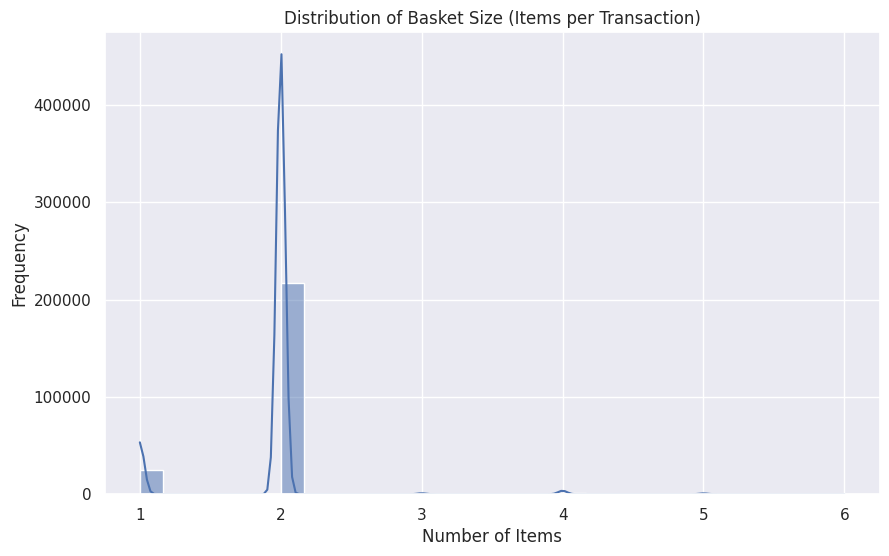


The basket value : 


,count
TOT_SALES,
9.2,22548
7.4,22247
6.0,20478
7.6,19976
8.8,19672
...,...
23.6,1
4.9,1
10.7,1


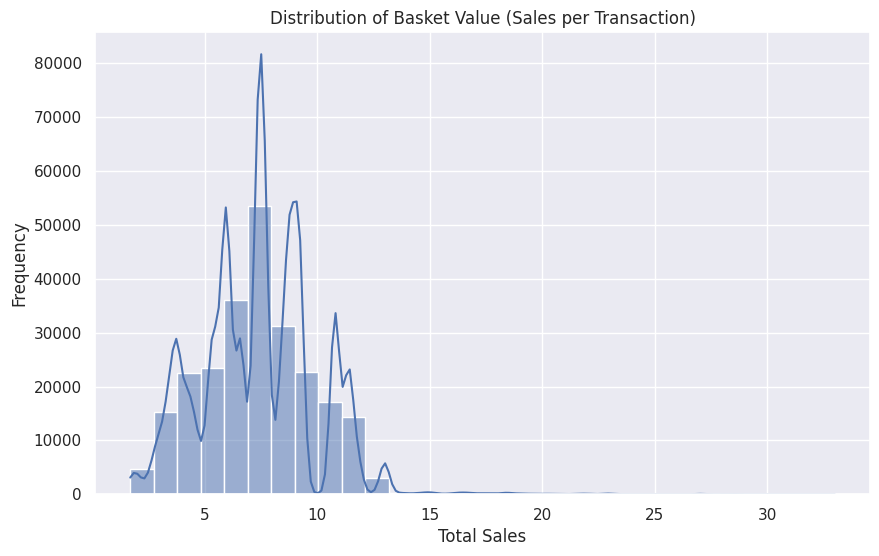

In [197]:
basket_size = data.groupby("TXN_ID")["PROD_QTY"].sum()
basket_value = data.groupby("TXN_ID")["TOT_SALES"].sum()

print(f"The basket size and basket value : ")
display(basket_size.value_counts())

plt.figure()
sns.histplot(basket_size, bins=30, kde=True)
plt.title("Distribution of Basket Size (Items per Transaction)")
plt.xlabel("Number of Items")
plt.ylabel("Frequency")
plt.show()

print(f"\nThe basket value : ")
display(basket_value.value_counts())

plt.figure()
sns.histplot(basket_value, bins=30, kde=True)
plt.title("Distribution of Basket Value (Sales per Transaction)")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()


####**📊 Interpretation : Basket Size & Basket Value Distributions**

##### **1. Distribution of Basket Size (Items per Transaction)**
- The **basket size distribution** is highly concentrated around **2 items per transaction**, which represents the most common shopping behavior.  
- A small number of transactions consist of only **1 item**, and very few transactions exceed **3 or more items**.  
- This indicates that the majority of customers purchase **snack products in small quantities**, treating them as impulse or supplementary buys rather than bulk purchases.  

✅ **Key Insight :**

Most transactions are light baskets (1–2 items), so promotions encouraging multi-buy offers (e.g., *“Buy 2, Get 1 Free”*) could potentially increase basket size.  


##### **2. Distribution of Basket Value (Sales per Transaction)**
- The **basket value distribution** is right-skewed, with most transactions falling between **5 and 10** dollr in sales value.  
- A peak is observed around (7–9), showing this is the typical spend per transaction.  
- Higher-value transactions (>15) are relatively rare, indicating that bulk or premium purchases are exceptions rather than the norm.  

✅ **Key Insight :**

Customers usually spend within a small range, reinforcing the idea of snack purchases being **low-ticket items**. Retailers could introduce **bundle pricing** or **upsell strategies** to push average spend slightly higher.  


📌 **Interpretation :**

- The dataset reflects a **convenience/snack-driven purchasing pattern** with small baskets and modest spending.  
- Business opportunities lie in **nudging customers towards slightly larger basket sizes and higher-value transactions** through promotions, product bundling, or targeted offers.  


###3.6. Product Quantity vs Customer Segment :

The average product quantity by customer segment : 


,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
7,OLDER FAMILIES,Mainstream,1.948795
8,OLDER FAMILIES,Premium,1.945496
6,OLDER FAMILIES,Budget,1.945384
16,YOUNG FAMILIES,Mainstream,1.941408
15,YOUNG FAMILIES,Budget,1.941226
17,YOUNG FAMILIES,Premium,1.938149
9,OLDER SINGLES/COUPLES,Budget,1.914920
11,OLDER SINGLES/COUPLES,Premium,1.913949
1,MIDAGE SINGLES/COUPLES,Mainstream,1.911942
10,OLDER SINGLES/COUPLES,Mainstream,1.911201


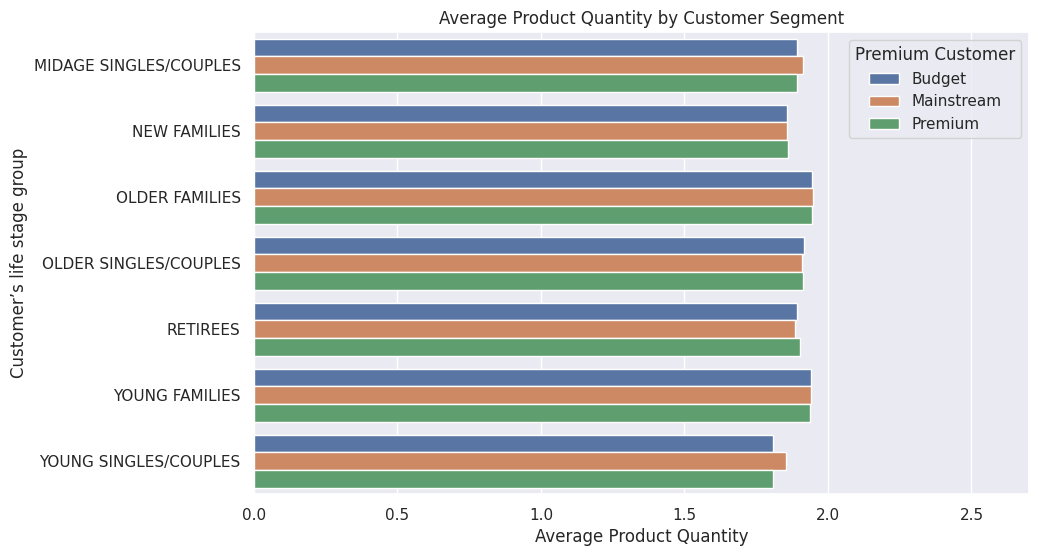

In [198]:
qty_vs_segment = data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].mean().reset_index()

print(f"The average product quantity by customer segment : ")
display(qty_vs_segment.sort_values("PROD_QTY", ascending=False))

plt.figure()
sns.barplot(x="PROD_QTY", y="LIFESTAGE", hue="PREMIUM_CUSTOMER", data=qty_vs_segment)
plt.title("Average Product Quantity by Customer Segment")
plt.legend(title = "Premium Customer")
plt.ylabel("Customer’s life stage group")
plt.xlabel("Average Product Quantity")
plt.xlim(0,2.7)
plt.show()


####**📊 Interpretation : Average Product Quantity by Customer Segment**

**Observations :**
- Across **all life stages and premium customer groups**, the **average product quantity per transaction is close to 2 items**.  
- **Variation is minimal** across different segments — indicating a consistent purchasing pattern regardless of life stage or premium classification.  
- Slight differences are observed:  
  - **Young Families** and **Older Families** show marginally higher averages, suggesting family groups may purchase slightly larger quantities.  
  - **Young Singles/Couples** tend to have a slightly lower average basket size compared to other groups.  
  - Differences between **Budget, Mainstream, and Premium** customers are very small, showing that spending tier has little effect on average item quantity.  

✅ **Key Insight :**

- **Customer life stage** has a modest impact: Families (both young and older) lean toward buying marginally more products per transaction than singles/couples.  
- **Premium segmentation** (Budget vs. Mainstream vs. Premium) is not a strong driver of product quantity — customer type does not significantly change basket size.  
- The overall **stability of basket quantity (~2 items)** aligns with earlier findings that transactions are generally small, reinforcing the snack/convenience nature of purchases.  

📌 **Interpretation :**

This analysis suggests that, while different demographic groups (life stages) influence **who buys more**, the differences are relatively small.  

- **Promotional campaigns** may need to focus less on increasing *quantity per basket* (since it’s already stable) and more on **increasing basket value** through upselling or premium product positioning.  
- For **family segments**, bundle or multi-pack deals could resonate better, while **singles/couples** may be more responsive to value-driven promotions.  


###3.7. Monthly/Quarterly Trends :

The monthly sales trends : 


,Period,TOT_SALES
0,2018-7,154514.50
1,2018-8,147422.05
2,2018-9,150058.90
3,2018-10,153454.10
4,2018-11,149609.50
5,2018-12,156461.60
6,2019-1,151593.80
7,2019-2,140480.00
8,2019-3,155772.80
9,2019-4,149374.20


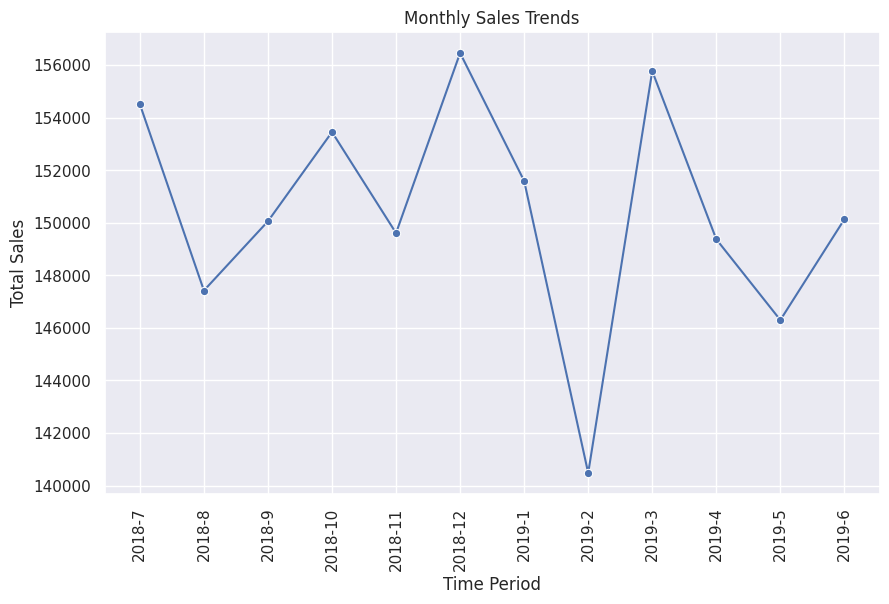

In [199]:
temporal_sales = data.groupby(["YEAR", "MONTH"])["TOT_SALES"].sum().reset_index()
temporal_sales["Period"] = temporal_sales["YEAR"].astype(str) + "-" + temporal_sales["MONTH"].astype(str)

print(f"The monthly sales trends : ")
display(temporal_sales[['Period','TOT_SALES']])

plt.figure()
sns.lineplot(x="Period", y="TOT_SALES", data=temporal_sales, marker="o")
plt.title("Monthly Sales Trends")
plt.xlabel("Time Period")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()


#### **📊 Interpretation : Monthly Sales Trends**

**Observations :**
- Overall sales remain **fairly stable**, fluctuating around **148K – 156K** across the months.  
- **Highest peak :** December 2018 approximately (156K) and March 2019 (~156K), suggesting strong seasonal or promotional sales.  
- **Lowest point :** February 2019 (~141K), showing a sharp dip compared to surrounding months.  
- Sales show **repeated surges around year-end and early Quatre2**, hinting at periodic demand spikes.  

✅ **Key Insight :**

- **Seasonality effect :**  
  - December peak likely tied to holiday shopping.  
  - March rebound could reflect post-holiday restocking or seasonal promotions.  
- **Sales dip in February :**  
  - Consistent with shorter month length and possibly reduced consumer spending after holiday season.  
- **Steady baseline :** Outside of peaks and dips, sales hover in a narrow range (~148K–153K), showing stable demand.  

📌 **Interpretation :**

The data indicates that while the business enjoys stable monthly sales, there are clear **seasonal spikes and dips**.  

- **December** is a major sales driver → leverage with targeted promotions, gift bundles, and holiday campaigns.  
- **February slump** → opportunity to counteract with loyalty rewards or off-season discounts.  
- Maintaining strong performance in **March** suggests potential for quarterly promotions timed around this rebound.  


###3.8. Week-over-Week Sales :

The weekly sales trends : 


,YEAR,WEEK,TOT_SALES
2,2018,3,209151.70
5,2019,1,208711.90
0,2018,1,208621.90
1,2018,2,208529.25
8,2019,4,208208.40
6,2019,2,207921.65
3,2018,4,206085.40
7,2019,3,203255.60
4,2018,5,79132.40
9,2019,5,65559.50


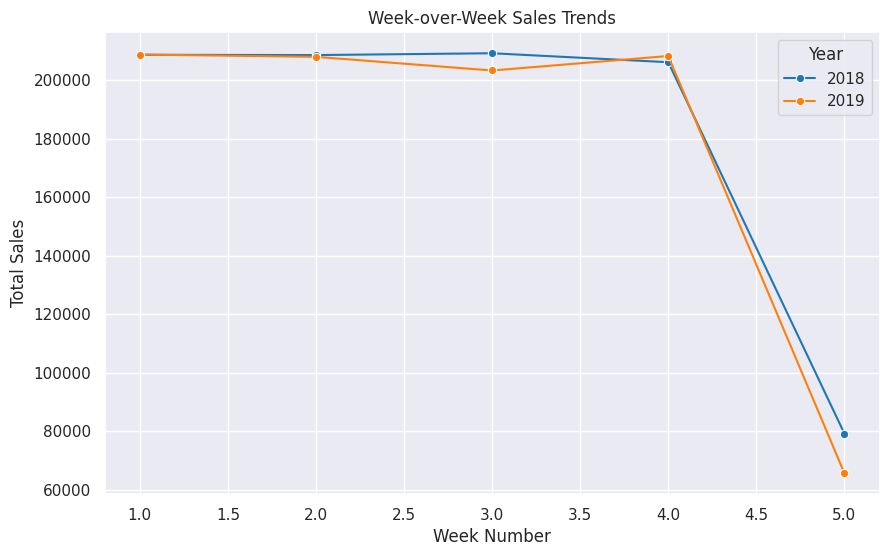

In [200]:
weekly_sales = data.groupby(["YEAR", "WEEK"])["TOT_SALES"].sum().reset_index()

print(f"The weekly sales trends : ")
display(weekly_sales.sort_values("TOT_SALES", ascending=False))

plt.figure()
sns.lineplot(x="WEEK", y="TOT_SALES", hue="YEAR", data=weekly_sales, marker="o", palette="tab10")
plt.title("Week-over-Week Sales Trends")
plt.legend(title="Year")
plt.xlabel("Week Number")
plt.ylabel("Total Sales")
plt.show()


#### **📊 Interpretation : Week-over-Week Sales Trends**

**Observations :**
- **High sales consistency :** Weeks 1–4 show very stable sales levels, staying around **205K–210K** in both years (2018 and 2019).  
- **Sharp drop in Week 5 :** Sales plummet drastically — ~80K in 2018 and ~65K in 2019, marking the lowest point in the period.  
- **Year-over-year comparison :**
  - Sales in 2018 and 2019 track very closely across all weeks.  
  - The Week 5 decline is more severe in 2019 than 2018.  

✅ **Key Insight :**

- **Strong start of the month :** Consistent high sales in the first four weeks suggest stable consumer demand.  
- **End-of-month drop :** The steep fall in Week 5 indicates a structural trend — likely due to shorter purchase cycles, paycheck timing, or fewer shopping days in those weeks.  
- **Year-over-year similarity :** Since both years follow the same weekly pattern, the trend seems to be systemic rather than random.  

📌 **Interpretation :**

This analysis highlights that sales are **front-loaded within each month**, with the bulk occurring in the first four weeks.  

- Businesses can **capitalize early in the month** with promotions when sales are naturally strong.  
- **Week 5 is a weak sales period** — targeted discounts or marketing campaigns could help offset the slowdown.  
- Since the trend repeats across years, planning inventory and marketing around this **monthly sales cycle** will optimize performance.  


###3.9. Temporal Segment Analysis :

The sales trends by customer segment : 


,Period,LIFESTAGE,TOT_SALES
3,2018-7,OLDER SINGLES/COUPLES,32683.70
24,2018-10,OLDER SINGLES/COUPLES,32618.30
38,2018-12,OLDER SINGLES/COUPLES,32511.30
59,2019-3,OLDER SINGLES/COUPLES,32341.30
17,2018-9,OLDER SINGLES/COUPLES,31676.70
...,...,...,...
29,2018-11,NEW FAMILIES,3869.20
1,2018-7,NEW FAMILIES,3859.60
71,2019-5,NEW FAMILIES,3855.80
8,2018-8,NEW FAMILIES,3799.25


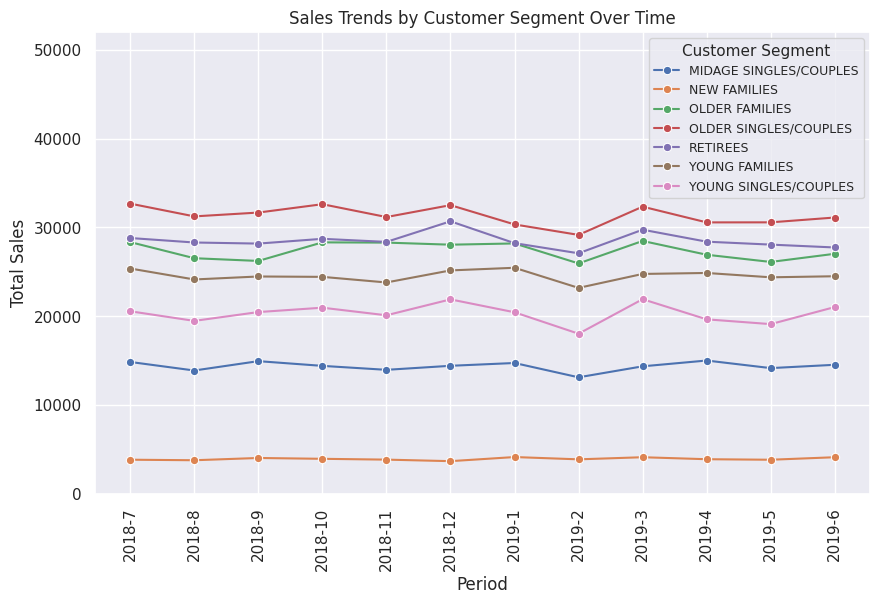

In [201]:
temporal_segment = data.groupby(["YEAR", "MONTH", "LIFESTAGE"])["TOT_SALES"].sum().reset_index()
temporal_segment["Period"] = temporal_segment["YEAR"].astype(str) + "-" + temporal_segment["MONTH"].astype(str)

print(f"The sales trends by customer segment : ")
display(temporal_segment[["Period", "LIFESTAGE", "TOT_SALES"]].sort_values("TOT_SALES", ascending=False))

plt.figure()
sns.lineplot(x="Period", y="TOT_SALES", hue="LIFESTAGE", data=temporal_segment, marker="o")
plt.title("Sales Trends by Customer Segment Over Time")
plt.xticks(rotation=90)
plt.ylabel("Total Sales")
plt.ylim(0,52000)
plt.legend(title="Customer Segment", title_fontsize=11, fontsize=9, loc='upper right', markerscale=1)
plt.show()


#### **📊 Interpretation : Sales Trends by Customer Segment Over Time**

**Observations :**
- **Older Singles/Couples** consistently lead sales, averaging around **30K–33K** per month, showing their dominance as the largest customer group.  
- **Retirees** and **Older Families** follow closely, maintaining sales in the **27K–30K** range, indicating strong and stable purchasing power.  
- **Young Families** and **Young Singles/Couples** contribute moderate sales (~20K–25K), with slight month-to-month fluctuations.  
- **Midage Singles/Couples** show lower sales (~13K–15K), remaining steady but relatively smaller contributors.  
- **New Families** are consistently the **smallest group**, with sales below **5K**, highlighting their limited role in total sales.

✅ **Key Insight :**

- **Stability across segments :** Most segments follow a stable pattern over time, with only minor seasonal variations.  
- **Core customer base :** Older demographics (Singles/Couples, Families, Retirees) drive the majority of sales, showing brand loyalty and steady demand.  
- **Growth opportunities :** Younger and midage groups underperform compared to older segments, suggesting potential for targeted promotions to capture more share.  
- **New Families as niche :** Their consistently low sales indicate either limited demand or misalignment with the product category — marketing campaigns may need to be re-evaluated.

📌 **Interpretation :**

This trend analysis reveals that **sales are heavily concentrated in older life-stage groups**, making them the key drivers of revenue.  
For sustained growth, the business should **continue catering to older customer segments** while **designing targeted strategies for younger and family-oriented groups** to expand their sales contribution over time.


###3.10. Correlation Matrix :

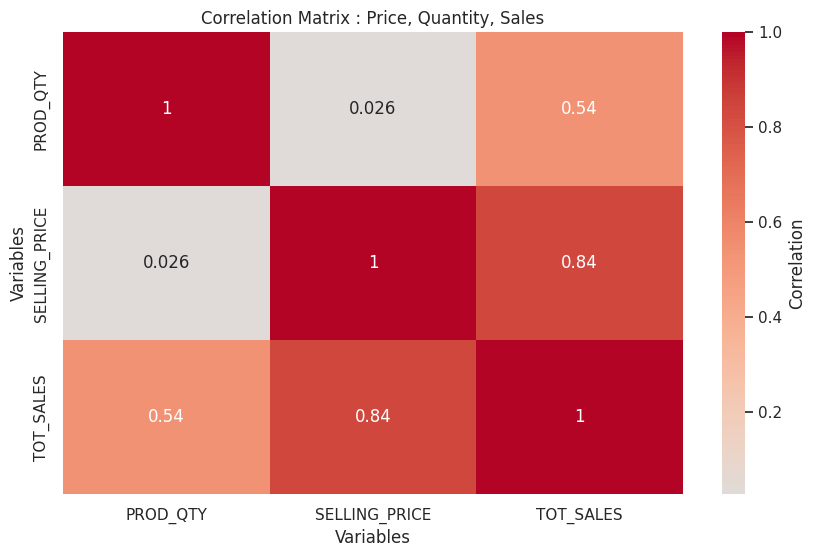

In [202]:
corr_matrix = data[["PROD_QTY", "SELLING_PRICE", "TOT_SALES"]].corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix : Price, Quantity, Sales")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()


#### **📊 Correlation Analysis : Price, Quantity, and Sales**  

**Observations :**  
- **TOT_SALES vs SELLING_PRICE → Strong positive correlation (0.84)**  
  - Revenue is heavily influenced by product price.  

- **TOT_SALES vs PROD_QTY → Moderate positive correlation (0.54)**  
  - Higher sales volume contributes to revenue but less strongly than price.  

- **SELLING_PRICE vs PROD_QTY → Very weak correlation (0.026)**  
  - Price and quantity sold are nearly independent → price changes don’t strongly affect sales volume.  

✅ **Key Insight :**  

- **Pricing is the main revenue driver** → Optimizing price has the greatest effect on total sales.  
- **Quantity has secondary impact** → Increasing units sold helps, but less than price adjustments.  
- **Low price–quantity link** → Suggests demand may be relatively **price inelastic**, giving flexibility for pricing strategies.  

📌 **Interpretation :**

The analysis highlights that **selling price is the most critical factor** for driving revenue, while sales quantity plays a supporting role.  

- Use **price optimization** (e.g., discounts, premium pricing, bundling) to maximize revenue.  
- Support with **quantity-based promotions** (e.g., “buy more, save more”) to boost units sold.  
- Since demand volume shows little dependence on price, the business can experiment with pricing without risking large drops in sales quantity.  


###3.11. Price Sensitivity by Demographics :

The average price paid by customer segment : 


,LIFESTAGE,PREMIUM_CUSTOMER,SELLING_PRICE
19,YOUNG SINGLES/COUPLES,Mainstream,4.065642
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994241
12,RETIREES,Budget,3.924404
14,RETIREES,Premium,3.920942
3,NEW FAMILIES,Budget,3.917688
4,NEW FAMILIES,Mainstream,3.916133
11,OLDER SINGLES/COUPLES,Premium,3.893182
9,OLDER SINGLES/COUPLES,Budget,3.882096
5,NEW FAMILIES,Premium,3.872110
13,RETIREES,Mainstream,3.844294


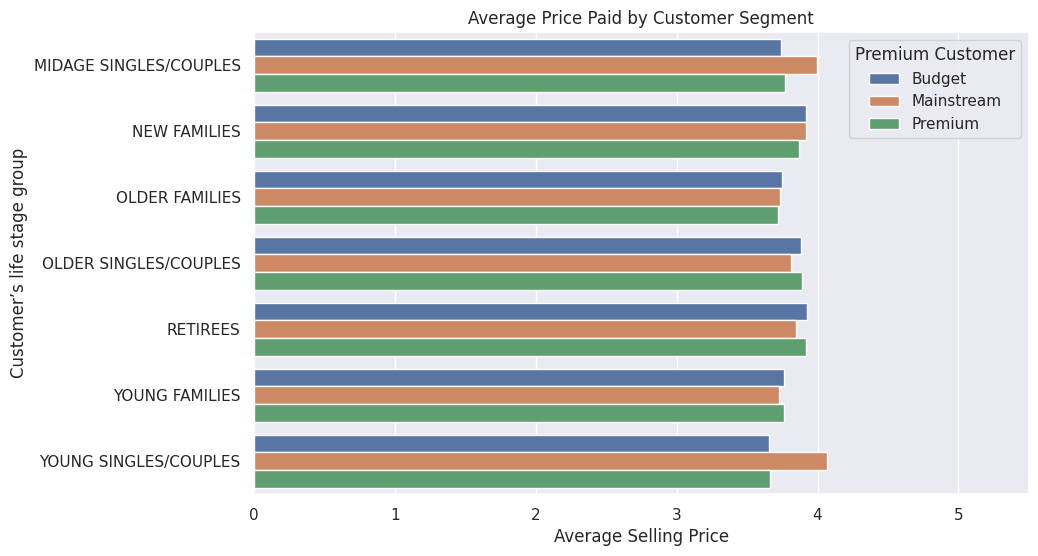

In [203]:
price_segment = data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["SELLING_PRICE"].mean().reset_index()

print(f"The average price paid by customer segment : ")
display(price_segment.sort_values("SELLING_PRICE", ascending=False))

plt.figure()
sns.barplot(x="SELLING_PRICE", y="LIFESTAGE", hue="PREMIUM_CUSTOMER", data=price_segment)
plt.title("Average Price Paid by Customer Segment")
plt.legend(title = "Premium Customer")
plt.ylabel("Customer’s life stage group")
plt.xlabel("Average Selling Price")
plt.xlim(0,5.5)
plt.show()


#### **📊 Interpretation : Average Price Paid by Customer Segment**  

**Observations :**  
- Across all **lifestages**, the **average selling price** is fairly consistent, ranging around **3.5 – 4.2**.  
- **Mainstream customers** tend to pay slightly more than **Budget** and **Premium** segments in several groups (e.g., *Young Singles/Couples*, *Midage Singles/Couples*).  
- Differences across **LIFESTAGE groups** are minor, showing no extreme price variation by age or family status.  
- **Retirees, Older Singles/Couples, and Young Families** consistently fall in the **3.8 – 4.0** price range across all segments.  

✅ **Key Insight :**

- **Price stability :** Pricing strategy appears uniform across customer groups, suggesting little price discrimination between lifestages.  
- **Mainstream customers paying more :** Indicates possible willingness among the **middle-market** segment to accept higher prices.  
- **Premium segment not always highest :** Surprising finding—Premium customers are not consistently paying the most, which could suggest effective discounting or loyalty benefits targeted at them.  

📌 **Interpretation :**

The visualization suggests that **average price sensitivity is low across demographic (lifestage) groups**, and instead, **purchase behavior by segment type (Budget, Mainstream, Premium)** has more influence.  

- **Opportunity with mainstream customers** → They already accept slightly higher prices, making them ideal for upselling or bundling strategies.  
- **Premium customers** → May be receiving discounts or targeting deals; business could revisit if this aligns with profitability goals.  
- **Budget customers** → Their spending is close to Premium, meaning pricing tiers are not sharply differentiated—potential risk of **cannibalization** between segments.  


###3.12. Pack Size Preference :

The Pack size preferences : 


,PACK_SIZE,TOT_SALES
0,175,485437.4
1,150,289681.8
2,134,177655.5
3,110,162765.4
4,170,146673.0
5,330,136794.3
6,165,101360.6
7,380,75419.6
8,270,55425.4
9,210,43048.8


/tmp/ipython-input-2477311417.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PACK_SIZE", y="TOT_SALES", data=pack_pref, palette="viridis")


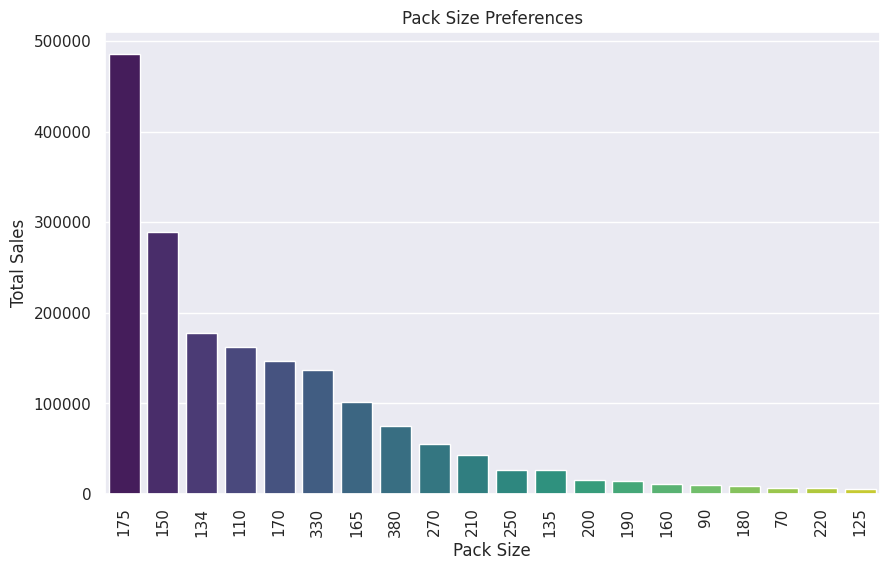

In [204]:
pack_pref = data.groupby("PACK_SIZE")["TOT_SALES"].sum().sort_values(ascending=False).reset_index()

print(f"The Pack size preferences : ")
display(pack_pref.sort_values("TOT_SALES", ascending=False))

plt.figure()
sns.barplot(x="PACK_SIZE", y="TOT_SALES", data=pack_pref, palette="viridis")
plt.title("Pack Size Preferences")
plt.xlabel("Pack Size")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()


#### **📊 Interpretation : Top 10 Pack Size Preferences **

**Observations :**  
- **175 pack size** dominates sales by a huge margin (~480K), far ahead of all other pack sizes.  
- The **next highest sellers** are **150 (~285K)** and **134 (~175K)** pack sizes, but they are still significantly lower than the 175 size.  
- Mid-range pack sizes like **110, 170, 330, and 165** contribute moderately (~140K–180K).  
- Larger pack sizes (e.g., **380, 270, 210**) show noticeably lower sales compared to smaller sizes.  
- Very small and niche sizes (e.g., **70, 90, 125, 160, 180, 200, 220**) contribute minimally to total sales.  

✅ **Key Insight :**

- **Strong consumer preference for smaller pack sizes**: 175, 150, and 134 dominate, suggesting convenience or affordability drives purchase decisions.  
- **Mid-size packs (110–330 range)** still perform reasonably well, appealing to a broad customer base.  
- **Large packs have weaker demand**: Possibly due to higher upfront cost or storage constraints.  
- **Skewed sales distribution**: A few pack sizes account for the majority of revenue, while many others contribute marginally.  

📌 **Interpretation :**

The analysis shows that **sales are highly concentrated in a few pack sizes**, especially the **175 pack**, which could be the company’s flagship offering.  

- **Focus marketing and availability** on top-performing pack sizes (175, 150, 134) to sustain strong sales.  
- **Evaluate underperforming pack sizes** → consider reducing SKUs or repositioning them (e.g., bundling large packs with discounts).  
- **Mid-range packs** provide a balanced opportunity → maintain supply for varied customer preferences.  
- Insights suggest customers value **affordability, convenience, and portion control** when choosing pack sizes.  


### 3.13. Store & Brand Interaction :

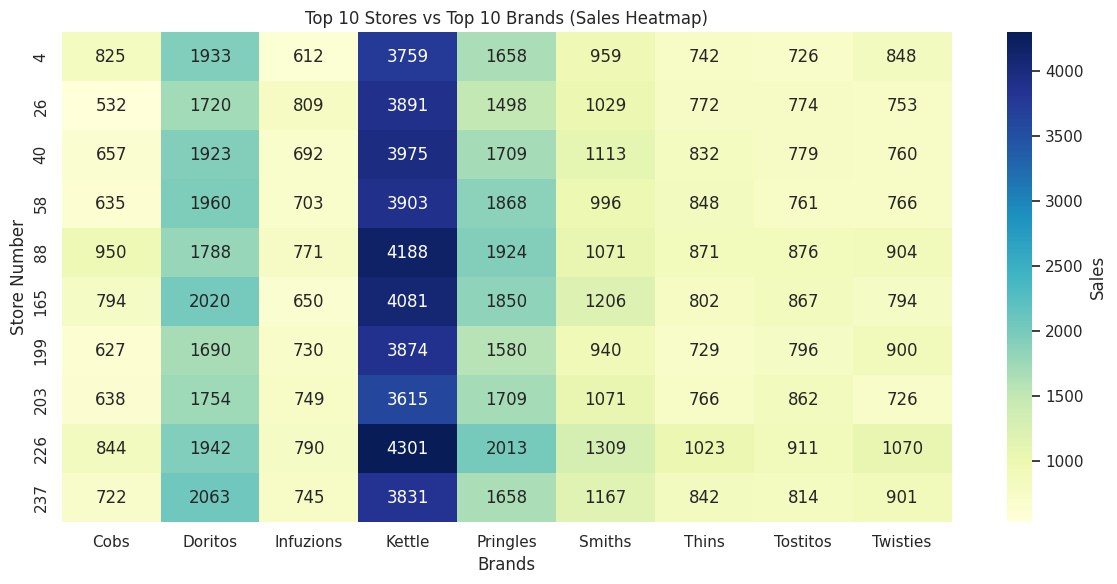

In [205]:
# Aggregating total sales by store and brand
store_brand = data.groupby(["STORE_NBR", "BRANDS"])["TOT_SALES"].sum().reset_index()

# Finding top 10 selling brands overall
top_brands = store_brand.groupby("BRANDS")["TOT_SALES"].sum().nlargest(10).index

# Finding top 10 selling stores overall
top_stores = store_brand.groupby("STORE_NBR")["TOT_SALES"].sum().nlargest(10).index

# Filtering dataset for top 10 stores and brands
filtered_data = store_brand[store_brand["BRANDS"].isin(top_brands) & store_brand["STORE_NBR"].isin(top_stores)]

# Creating pivot table for heatmap
pivot_brand = filtered_data.pivot_table(index="STORE_NBR", columns="BRANDS", values="TOT_SALES").fillna(0)

# Plot as heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_brand, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Sales'})
plt.title("Top 10 Stores vs Top 10 Brands (Sales Heatmap)")
plt.ylabel("Store Number")
plt.xlabel("Brands")
plt.tight_layout()
plt.show()

#### **📊 Interpretation : Top 10 Stores vs Top 10 Brands**  

**Observations :**  
- **Kettle** is the strongest-performing brand across all top stores, with sales consistently above **3,600–4,300**, making it the clear leader.  
- **Doritos** is the second-best performer, with sales ranging **~1,700–2,060**, showing strong popularity.  
- **Pringles** and **Smiths** sit in the mid-range, with sales between **1,500–2,000** and **900–1,300**, respectively.  
- Smaller brands like **Twisties, Tostitos, Thins, Cobs, Infuzions** generate lower but steady sales (**600–1,000** per store).  
- Store **226** leads in total sales across multiple brands, especially **Kettle (4,301)** and **Pringles (2,013)**.  
- Stores **88, 165, and 226** consistently perform well across most brands, indicating strong customer traffic or brand affinity.  

✅ **Key Insight :**

- **Brand dominance** → Kettle is the primary sales driver, with Doritos as the next key contributor.  
- **Cross-store consistency** → Kettle and Doritos are strong across all stores, showing broad consumer appeal.  
- **Store-specific strengths** → Stores like **226 and 88** outperform others, making them ideal for promotions or launches.  
- **Smaller brands’ role** → Though weaker individually, niche brands (Cobs, Infuzions, Thins, Twisties) add variety and maintain steady sales.  

📌 **Interpretation :**

The heatmap reveals that **a few brands dominate overall sales (Kettle and Doritos)**, while secondary brands provide product diversity.  

- **Focus on top brands :** Ensure stock availability and targeted promotions for Kettle and Doritos.  
- **Leverage high-performing stores :** Use stores like **226 and 88** as pilots for campaigns or new product launches.  
- **Revisit weaker brands :** Consider repositioning, bundling, or promotions for consistently underperforming brands.  
- **Balance assortment :** Maintain variety to serve niche customer preferences while prioritizing leading brands.  


---

##4. Conclusion :


###**Conclusions from the Analysis :**  

1. **Store-level Insights :**  
   - A handful of stores (e.g., **Store 226, 88, and 165**) generate the majority of sales.  
   - This indicates that **store size, location, and customer base** play a significant role in driving revenue.  
   - These top-performing stores can be leveraged for **piloting new campaigns, product launches, or targeted promotions**.  

2. **Brand-level Insights :**  
   - **Kettle** is the dominant brand, consistently leading both overall and store-specific sales.  
   - Other strong performers include **Doritos, Pringles, and Smiths**, while smaller brands contribute marginally.  
   - This shows that **brand loyalty** and **consumer preference** are concentrated in a few key brands.  

3. **Product & Pack Size Preferences :**  
   - **175g packs** are the most preferred, far ahead of other sizes.  
   - Mid-sized packs (150g–175g) dominate the sales landscape, while larger packs perform poorly.  
   - Customers prefer **convenient, moderately priced pack sizes**, suggesting impulse-driven or household-oriented consumption.  

4. **Customer Demographics :**  
   - **Older Families, Retirees, and Young Singles/Couples** are the largest contributors to sales.  
   - **Budget and Mainstream customers** dominate across most life stages, while Premium customers contribute selectively.  
   - Demographics strongly influence **what customers buy and how much they spend**, but average product quantity per basket remains stable across groups.  

5. **Basket Analysis :**  
   - The majority of baskets contain only **1–2 items**, with an average spend of **$5–$10 per transaction**.  
   - This highlights the **snack/convenience nature** of purchases rather than bulk buying.  
   - Upselling strategies (e.g., **“Buy 2, Get 1 Free”**) could effectively increase basket size.  

6. **Temporal Sales Trends :**  
   - Sales remain stable overall, but **seasonality effects** are evident:  
     - Peaks in **December (holiday season)** and **March (quarterly rebound)**.  
     - A slump in **February**, likely due to the short month and post-holiday slowdown.  
   - Week-over-week analysis shows a strong **front-loading of sales in Weeks 1–4**, with sharp declines in **Week 5**.  
   - These cyclical patterns can help businesses **time promotions and manage inventory more effectively**.  

7. **Correlation Analysis :**  
   - **Selling price has the strongest influence on total sales (correlation = 0.84)**, compared to product quantity.  
   - Price and quantity are largely independent, suggesting demand is relatively **price inelastic**.  
   - This provides businesses with flexibility in **pricing strategies** without drastically impacting volume.  

8. **Store–Brand Interaction :**  
   - **Kettle and Doritos** consistently dominate across top stores.  
   - Some stores (e.g., **226 and 88**) outperform others across multiple brands, making them key strategic outlets.  
   - Secondary brands provide product diversity but contribute less to overall revenue.  

###**Final Interpretation :**  

- The retail dataset shows that **revenue is highly concentrated** in a few stores, brands, and pack sizes.  
- Customer purchases are **small and frequent**, reflecting the snack/convenience nature of products.  
- **Demographics and seasonality** play an important role in shaping sales patterns, while **price optimization** emerges as the most critical factor for maximizing revenue.  

  

###**Overall Conclusion :**

The analysis highlights that **success in this retail business is driven by a few dominant stores, brands, and pack sizes, combined with stable but seasonal demand patterns**.  
By **optimizing pricing, focusing on high-value customer segments, and tailoring inventory and marketing strategies**, businesses can significantly enhance sales performance and profitability.  




---


##5. Recommendations :

###**Recommendations for Future Work :**

1. **Targeted Promotions & Campaigns :**  
   - Leverage high-performing stores (e.g., Store 226, 88) for **new product launches and pilot campaigns**.  
   - Use **multi-buy promotions** to encourage larger basket sizes.  
   - Seasonal campaigns in **December** and **March** can maximize demand, while **February dips** can be mitigated with discounts or loyalty offers.  

2. **Inventory & Assortment Planning :**  
   - Prioritize stocking of **top-performing pack sizes (175g, 150g, 134g)**.  
   - Re-evaluate underperforming large pack sizes; consider repositioning, bundling, or SKU rationalization.  
   - Ensure consistent availability of top brands like **Kettle, Doritos, and Pringles** across all stores.  

3. **Customer Segmentation Strategy :**  
   - Focus on **Older Families, Retirees, and Young Singles/Couples** as primary target groups.  
   - Develop differentiated promotions for **Budget vs. Premium customers**, since both contribute significantly but exhibit different buying behaviors.  
   - Explore **untapped potential in New Families and Midage groups** with specialized marketing.  

4. **Pricing Strategy :**  
   - Since demand is **price inelastic**, experiment with **premium pricing** for high-demand products.  
   - Introduce **bundle discounts** to increase quantity purchased per transaction.  
   - Monitor price sensitivity across different demographics to refine targeted offers.  

5. **Future Analytical Enhancements :**  
   - Perform **time series forecasting** (ARIMA, Prophet, etc.) for predicting sales trends and planning inventory.  
   - Apply **market basket analysis (association rules)** to discover product affinities and cross-sell opportunities.  
   - Conduct **customer segmentation (clustering models)** to refine targeting beyond life stage and premium classification.  
   - Use **predictive models** (e.g., regression, XGBoost) to evaluate the impact of price, promotions, and demographics on sales.